<>:66: SyntaxWarning: invalid escape sequence '\Q'
<>:67: SyntaxWarning: invalid escape sequence '\D'
<>:68: SyntaxWarning: invalid escape sequence '\E'
<>:69: SyntaxWarning: invalid escape sequence '\D'
<>:66: SyntaxWarning: invalid escape sequence '\Q'
<>:67: SyntaxWarning: invalid escape sequence '\D'
<>:68: SyntaxWarning: invalid escape sequence '\E'
<>:69: SyntaxWarning: invalid escape sequence '\D'
C:\Users\adars\AppData\Local\Temp\ipykernel_12328\2054027383.py:66: SyntaxWarning: invalid escape sequence '\Q'
  'qoe': 'TrainedModel_20UE_2EN_RandomMode\QoE 06.16.34.txt',
C:\Users\adars\AppData\Local\Temp\ipykernel_12328\2054027383.py:67: SyntaxWarning: invalid escape sequence '\D'
  'delay': 'TrainedModel_20UE_2EN_RandomMode\Delay 06.16.34.txt',
C:\Users\adars\AppData\Local\Temp\ipykernel_12328\2054027383.py:68: SyntaxWarning: invalid escape sequence '\E'
  'energy': 'TrainedModel_20UE_2EN_RandomMode\Energy 06.16.34.txt',
C:\Users\adars\AppData\Local\Temp\ipykernel_12328\2054027383

Generating trend plots...


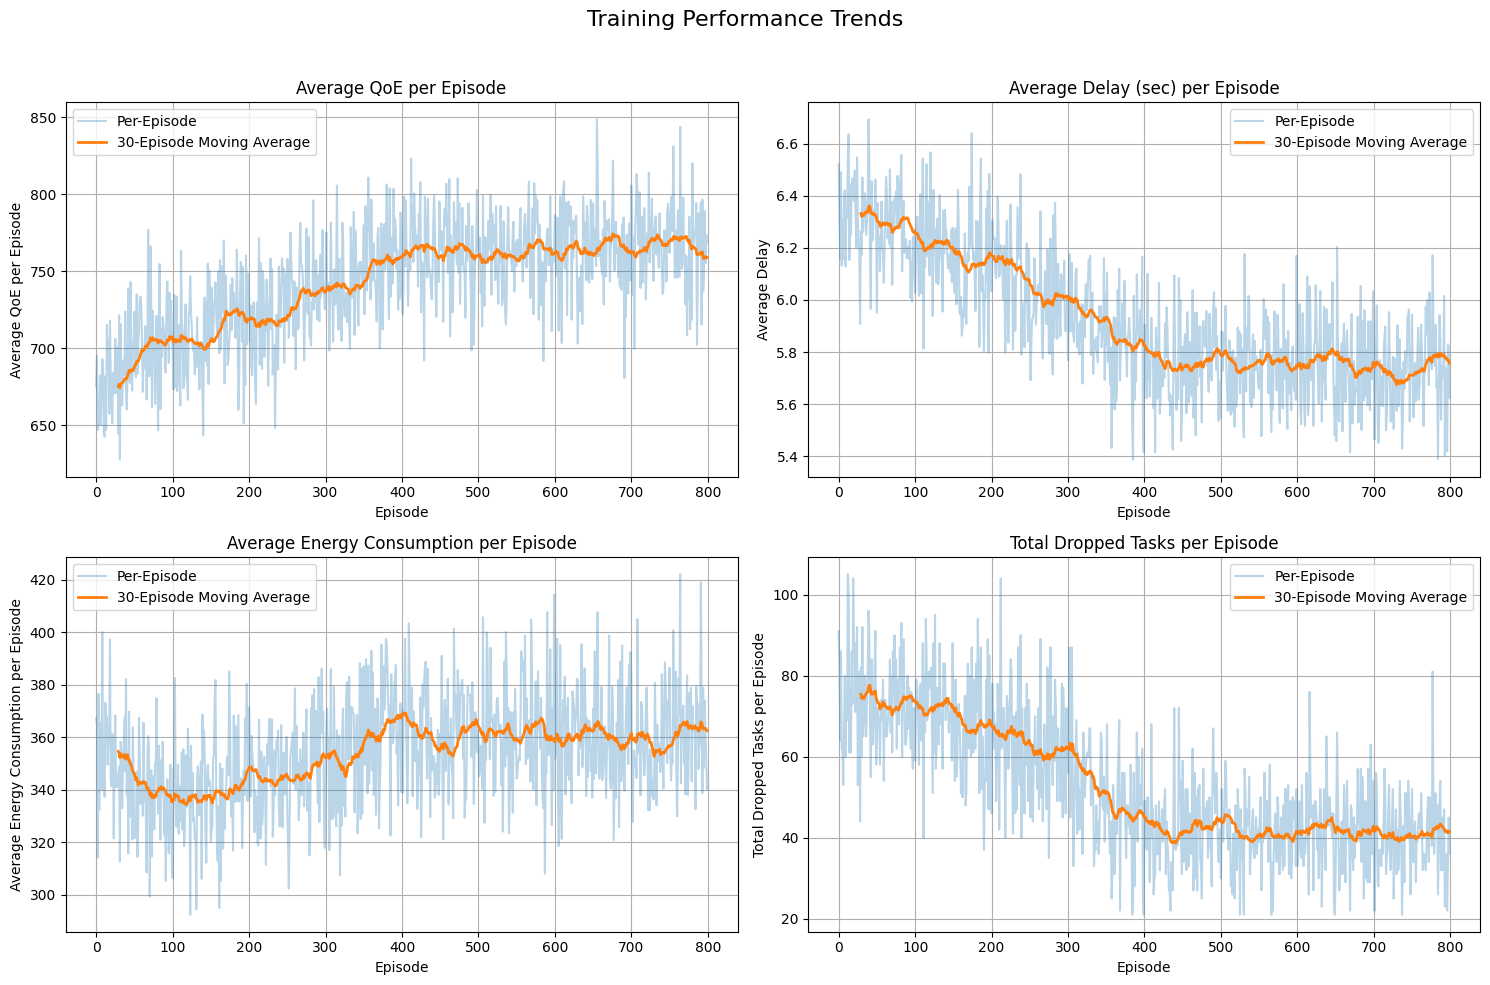

--------------------------Base Paper Implementation Plots---------------------------
Generating trend plots...


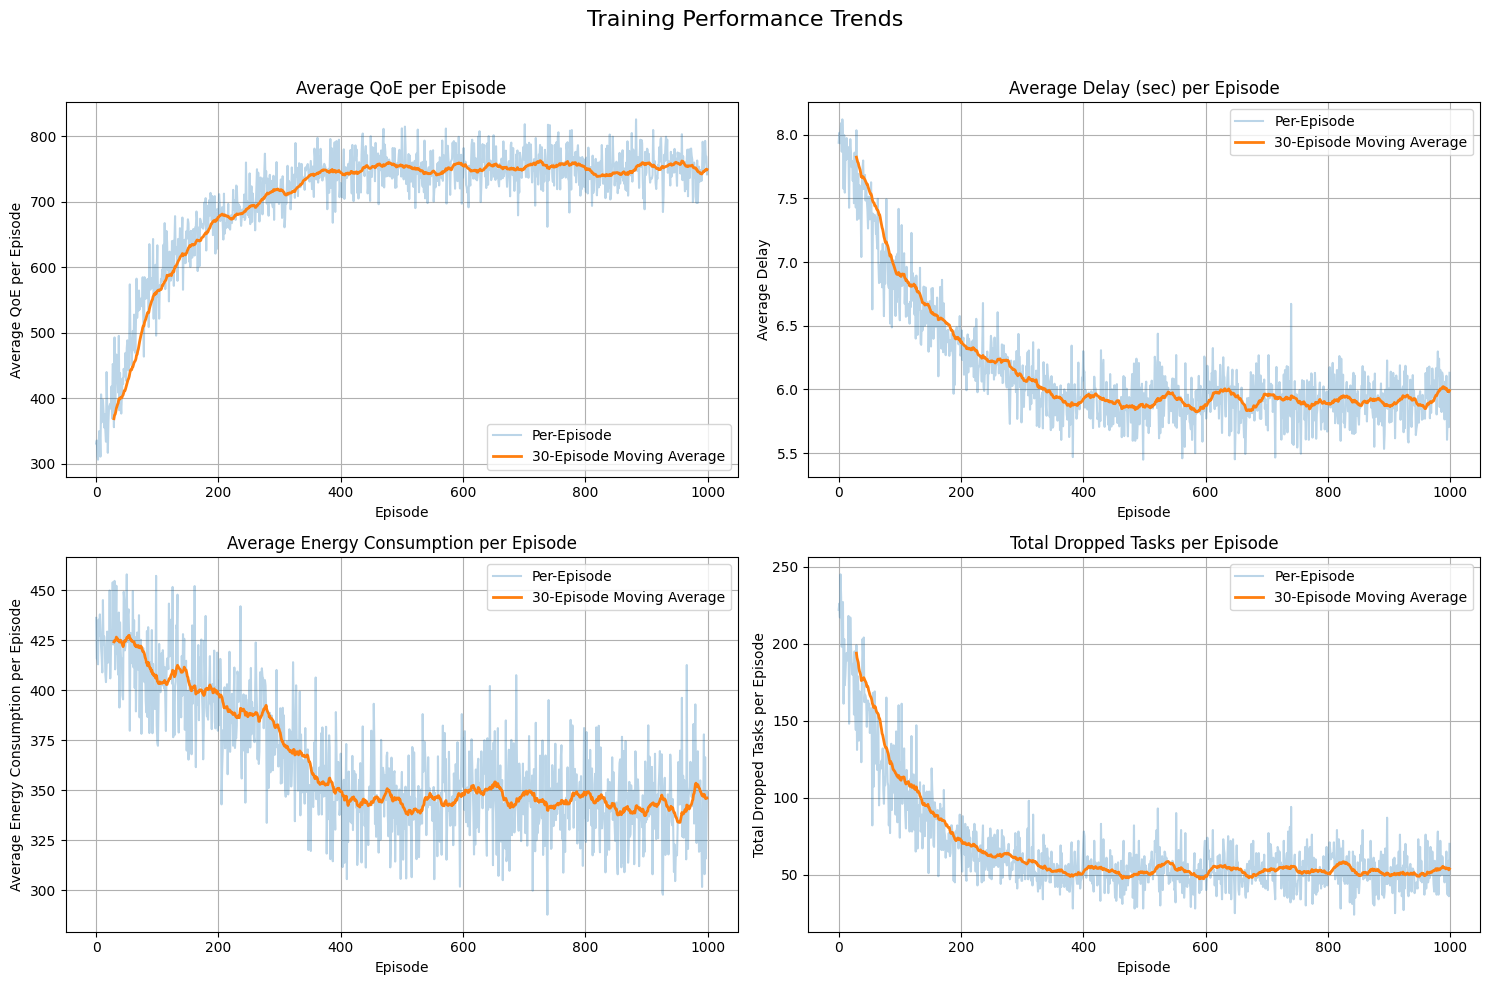

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_trends(data, titles):
    """Plots the raw per-episode trend and a smoothed moving average trend."""
    
    WINDOW_SIZE = 30
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Training Performance Trends', fontsize=16)
    axes = axes.flatten()

    for i, (metric, values) in enumerate(data.items()):
        episodes = np.arange(len(values))
        
        moving_avg = pd.Series(values).rolling(window=WINDOW_SIZE).mean()
        

        axes[i].plot(episodes, values, label='Per-Episode', alpha=0.3)
  
        axes[i].plot(episodes, moving_avg, label=f'{WINDOW_SIZE}-Episode Moving Average', linewidth=2)
        
        axes[i].set_title(titles[metric])
        axes[i].set_xlabel('Episode')
        axes[i].set_ylabel(titles[metric].split('(')[0].strip())
        axes[i].legend()
        axes[i].grid(True)
        
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig("performance_trends.png")
    plt.show()



try:
    files = {
        'qoe': 'QoE_modified_random.txt',
        'delay': 'Delay_modified_random.txt',
        'energy': 'Energy_modified_random.txt',
        'drops': 'Drop_modified_random.txt'
    }

    data = {metric: np.loadtxt(fname) for metric, fname in files.items()}

    titles = {
        'qoe': 'Average QoE per Episode',
        'delay': 'Average Delay (sec) per Episode',
        'energy': 'Average Energy Consumption per Episode',
        'drops': 'Total Dropped Tasks per Episode'
    }

    print("Generating trend plots...")
    plot_trends(data, titles)

    print("--------------------------Base Paper Implementation Plots---------------------------")
    files2 = {
            'qoe': 'TrainedModel_20UE_2EN_RandomMode\QoE 06.16.34.txt',
            'delay': 'TrainedModel_20UE_2EN_RandomMode\Delay 06.16.34.txt',
            'energy': 'TrainedModel_20UE_2EN_RandomMode\Energy 06.16.34.txt',
            'drops': 'TrainedModel_20UE_2EN_RandomMode\Drop 06.16.34.txt'
        }

    data2 = {metric: np.loadtxt(fname) for metric, fname in files2.items()}

    titles = {
        'qoe': 'Average QoE per Episode',
        'delay': 'Average Delay (sec) per Episode',
        'energy': 'Average Energy Consumption per Episode',
        'drops': 'Total Dropped Tasks per Episode'
    }

    print("Generating trend plots...")
    plot_trends(data2, titles)

except FileNotFoundError as e:
    print(f"Error: {e}.")
    print("Please make sure you have uploaded all the required .txt files to the Colab session.")
except Exception as e:
    print(f"An error occurred: {e}")